# 04.06 - Customizing Plot Legends

The simplest legend can be created with the <code>plt.legend()</code> command, which automatically creates a legend for any labeled plot elements:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

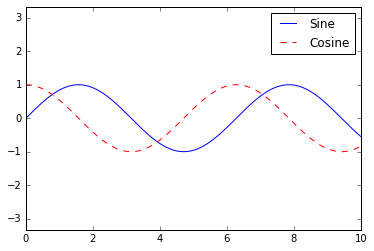

In [4]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

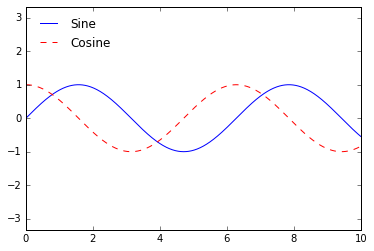

In [6]:
# upper left and no frame
ax.legend(loc='upper left', frameon=False)
fig

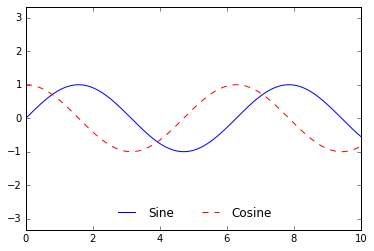

In [7]:
# specify the number of columns
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

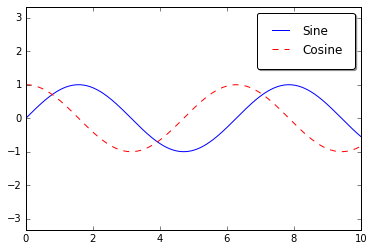

In [8]:
# rounded box, transparency (alpha), shadow and padding
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

In [11]:
# .. and so many more!
plt.legend?

### Choosing Elements for the Legend

We can pass a list to <code>plt.legend</code> and identify the elements in the legend:

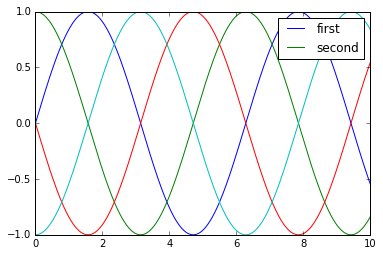

In [12]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second']);

### Legend for Size of Points

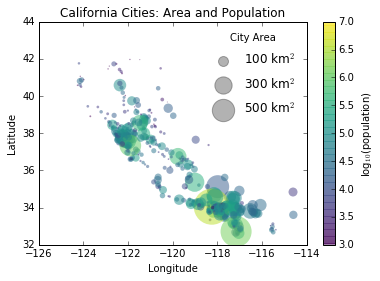

In [17]:
import pandas as pd
cities = pd.read_csv('../data/california_cities.csv')

# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=0.8, title='City Area')

plt.title('California Cities: Area and Population');

In this case, we have to 'invent' new objects (the three circles) to act as our legend by creating an empty list of ad-hoc objects.

### Multiple Legends

By default, Matplotlib only allows one legend per plot. If we try to use <code>plt.legend</code> a second time, it will simply override the first instance of the legend. 

A possible solution is creating a new legend artist from scratch, and then using the lower-level <code>ax.add_artist()</code> method to manually add the second artist to the plot:

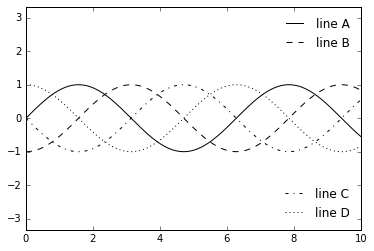

In [18]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);

This is a peek in the lower level _artist_ objects that make every Matplotlib objects, including legends. 

To have a better look at the source code, we can always use <code>f.arg??</code>.